In [1]:
IN_COLAB = 'google.colab' in str(get_ipython())
if IN_COLAB:
	!pip install seaborn
	!pip install statsmodels
	!pip install pycaret
	!pip install pyod

# requires ipyml
# Note pycaret and pmdarima libraries are incompatible for version 2021/12/24

# 3-D Visualization of Anomaly Detection Methods


In [2]:
%matplotlib widget

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from data.jpx import *
from utils.outlier import *
from pycaret.anomaly import *
import random
from sklearn import metrics
TSE33 = TOPIX_SECTORS()
NKY = Nikkei225() 
try:
	s
except NameError:
	inst = NKY.get_ric("6758.T")  # Small cap 1332, 3103, 5707, 6703,    Large cap 6758, 7203, 6098 9432
	print(f"inst: {inst}")
	s = Stock(inst, TSE33)
else:
    print(s.df_intraday.drop(columns=["COUNT", "VOLUME", "DATE", "TIME", "CLOSE_TPX", "RETURN_ADJ_TPX", "RETURN_NORM_TPX"]).head())

outliers_fraction = 0.02
random_state = np.random.RandomState(42)
field = "RETURN_NORM"
df = s.window(s.unique_dates[0], wdw_len=0)

inst: [132 '6758.T' 'Sony Group Corp' 'Electric Appliances']


### Set Model Name

In [3]:
model_name = 'abod' # ['abod', 'cluster', 'histogram', 'iforest', 'knn', 'lof', 'pca', 'svm']

## Global Outlier

     index  RETURN_NORM      time  Anomaly  Anomaly_Score
98      98     0.736463  0.332203        0  -8.037920e+03
99      99     0.454793  0.335593        0  -3.474562e+06
100    100     1.000000  0.338983        1  -5.786651e+01
101    101     0.454793  0.342373        0  -4.481860e+06
102    102     0.521704  0.345763        0  -1.931316e+07


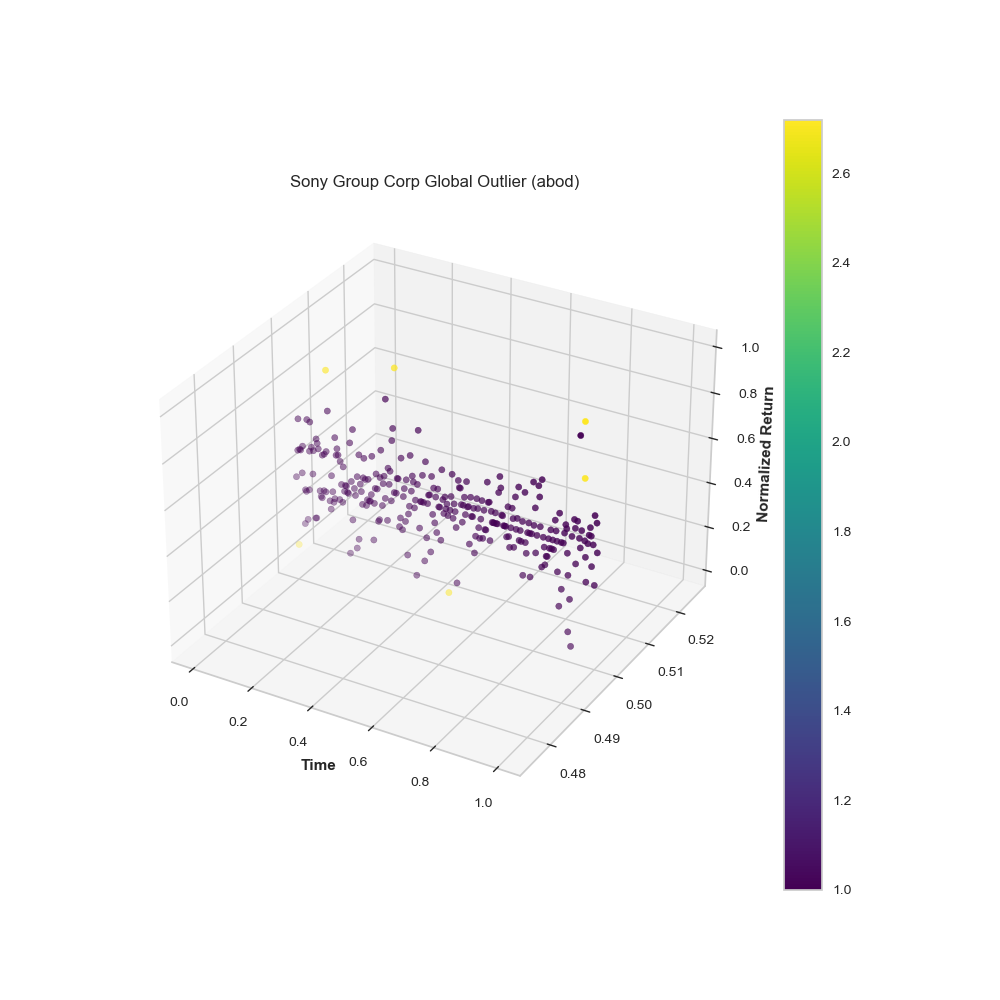

In [4]:
outlier_type = "Global" # ["Global", "Contextual", "Collective", "All Three"]
data, anomaly = injectOutlier(df, field, outlier_type, anomaly=100)

pycaret_setup = setup(data, session_id = 100, silent=True)
model = create_model(model_name, fraction=outliers_fraction)
results = assign_model(model)

xval = results['time']
yval = [0.5 for i in range(0,len(results))]
zval = results[field]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(xval, yval, zval, cmap=plt.cm.viridis, c=np.exp(results['Anomaly']))
ax.set_xlabel('Time', fontweight ='bold')
ax.set_zlabel('Normalized Return', fontweight ='bold')
ax.set_title(f"{inst[2]} {outlier_type} Outlier ({model_name})")
fig.colorbar(cax)
print(results[98:103].head())

## Contextual Outlier

     index  RETURN_NORM  RETURN_NORM_tpx      time  Anomaly  Anomaly_Score
98      98     0.741424         0.499454  0.332203        0   -1817.695311
99      99     0.457857         0.603910  0.335593        0  -17267.598177
100    100     0.547156         0.990954  0.338983        1     -18.316558
101    101     0.457857         0.549354  0.342373        0  -21795.776790
102    102     0.525218         0.574986  0.345763        0   -3466.306998


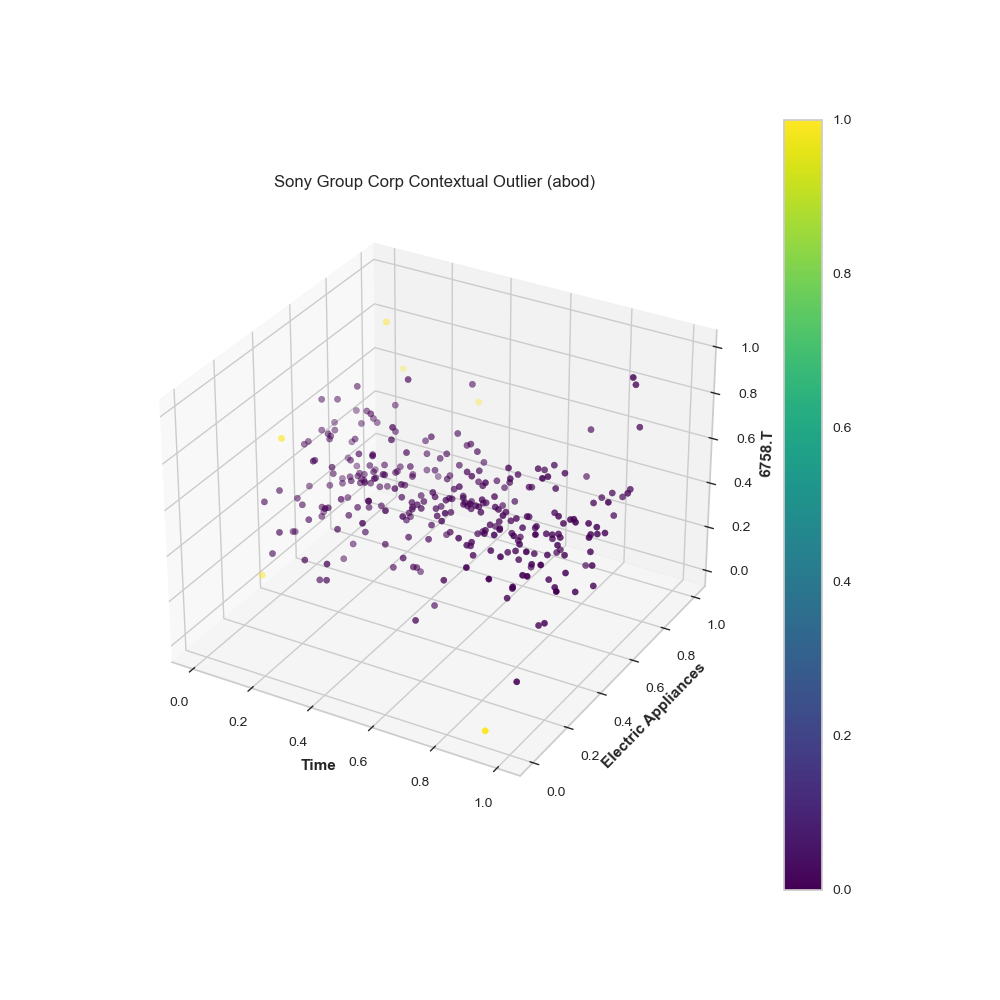

In [5]:
outlier_type = "Contextual" # ["Global", "Contextual", "Collective", "All Three"]
data, anomaly = injectOutlier(df, field, outlier_type, anomaly=100)

pycaret_setup = setup(data, session_id = 100, silent=True)
model = create_model(model_name, fraction=outliers_fraction)
results = assign_model(model)

xval = results['time']
yval = results['RETURN_NORM_tpx']
zval = results[field]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(xval, yval, zval, cmap=plt.cm.viridis, c=results['Anomaly']) 
ax.set_xlabel('Time', fontweight ='bold')
ax.set_ylabel(inst[3], fontweight ='bold')
ax.set_zlabel(inst[1], fontweight ='bold')
ax.set_title(f"{inst[2]} {outlier_type} Outlier ({model_name})")
fig.colorbar(cax)
print(results[98:103].head())

## Collective Outlier

     index  RETURN_NORM        x1      time  Anomaly  Anomaly_Score
98      98     0.178152  0.741424  0.332203        0   -5222.939773
99      99     0.189149  0.457857  0.335593        0 -625088.767269
100    100     0.191584  0.547156  0.338983        0 -270684.510457
101    101     0.187143  0.457857  0.342373        0 -675374.436269
102    102     0.197441  0.525218  0.345763        0 -251109.800854


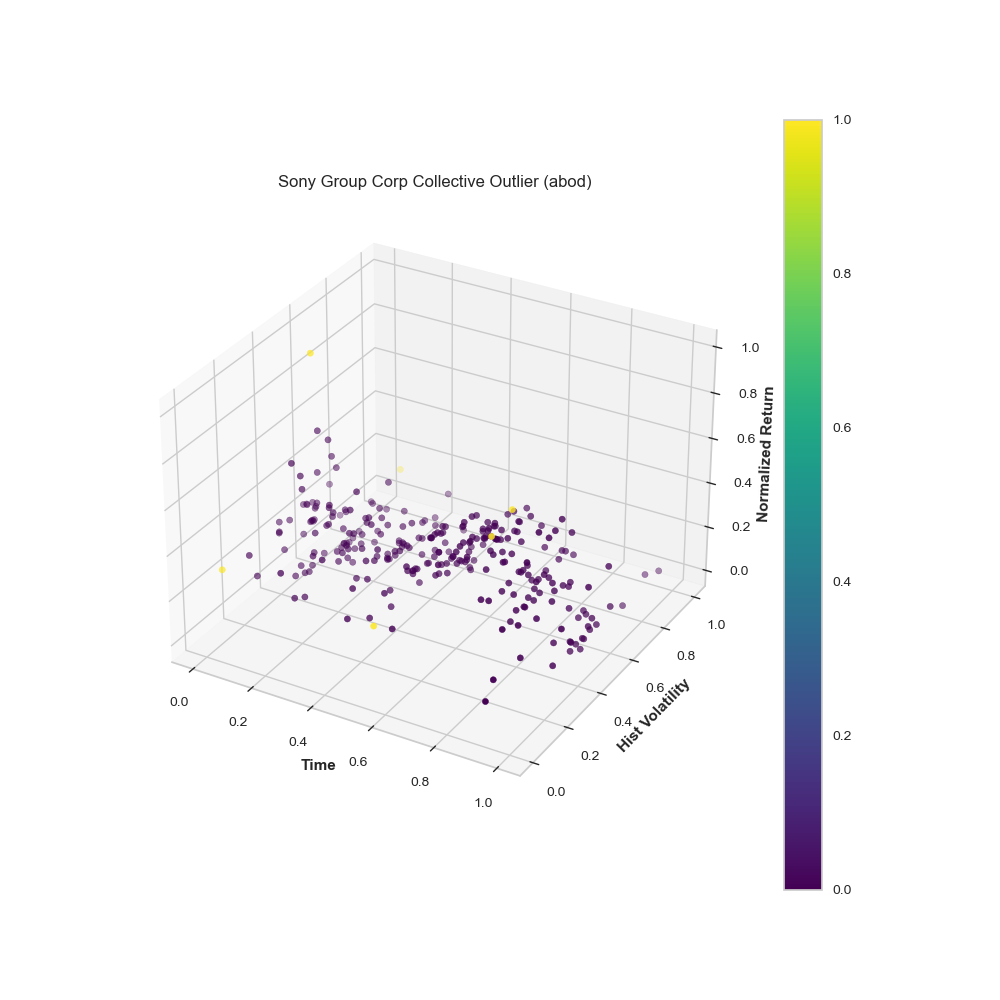

In [6]:
outlier_type = "Collective" # ["Global", "Contextual", "Collective", "All Three"]
data, anomaly = injectOutlier(df, field, outlier_type, anomaly=100)

pycaret_setup = setup(data, session_id = 100, silent=True)
model = create_model(model_name, fraction=outliers_fraction)
results = assign_model(model)

xval = results['time']
yval = results['x1']
zval = results[field]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(xval, yval, zval, cmap=plt.cm.viridis, c=results['Anomaly']) 
ax.set_xlabel('Time', fontweight ='bold')
ax.set_ylabel('Hist Volatility', fontweight ='bold')
ax.set_zlabel('Normalized Return', fontweight ='bold')
ax.set_title(f"{inst[2]} {outlier_type} Outlier ({model_name})")
fig.colorbar(cax)
print(results[98:103].head())